## Import libraries

In [429]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

### Data Collection

In [430]:
# Read the data from csv to train dataframe
train = pd.read_csv("train.csv")

In [431]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [432]:
# Check the structure of the data (rows, columns and data types) using info()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [433]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [434]:
# Check if there are any NAN values in any of the columns
train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [435]:
# Get the count of the number of rows with NAN value for each column
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [436]:
# Since there are around 177 rows with NAN values for Age out of 891, instead of dropping them, 
# we can replace them with mean value
mean_age = train['Age'].mean()
print(mean_age)
train['Age'].fillna(mean_age, inplace = True)

29.69911764705882


In [437]:
# Check again for NAN values, NAN values for Age are filled with valid values
train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [438]:
# Since there are only 2 NAN values for Embarked, check the possible values of Embarked before dropping the NAN rows
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [439]:
# Since there are 687 NAN values for Cabin, check the possible values of Cabin before dropping the Cabin column
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [440]:
# Drop Cabin column
train.drop(['Cabin'], axis = 1, inplace = True)

In [441]:
# Check again for NAN values, Cabin column is dropped
train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked        True
dtype: bool

In [442]:
# Drop remaining rows with Embarked as NAN value
train.dropna(axis = 0, inplace=True)

In [443]:
# Recheck the info again to make sure the NAN values are handled
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [444]:
# Clean the training set by dropping Name, Ticket which are categorical columns
train_tidy = pd.get_dummies(train.iloc[:,[0,1,2,4,5,6,7,9,10]], drop_first = True)
train_tidy.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### Data Exploration

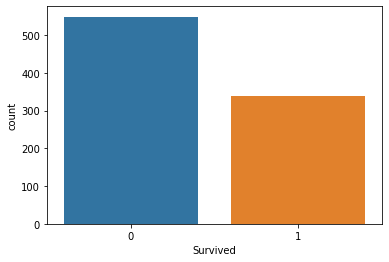

In [445]:
# Check the count of target variable 'Survived' in the data set
sns.countplot(x = 'Survived', data = train_tidy)

We can see clearly from the graph that percentage of people survived is less than the percentage of people did not survive.

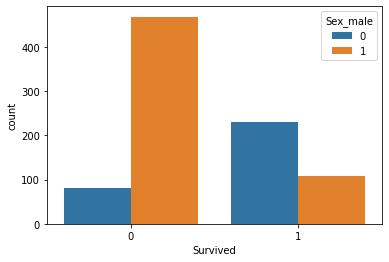

In [446]:
# Check the count of target variable 'Survived' in the data set with respect to 'Sex' variable
sns.countplot(x = 'Survived', hue = 'Sex_male', data = train_tidy)

This graph shows that percentage of males survived is less than the percentage of males that did not survive, which is reverse in case of females.
The percentage of females survived is more than the percentage of females that did not survive.

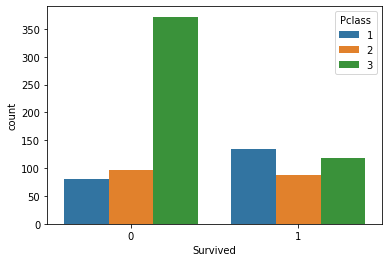

In [447]:
# Check the count of target variable 'Survived' in the data set with respect to 'Pclass' variable
sns.countplot(x = 'Survived', hue = 'Pclass', data = train_tidy)

Another important observation the people with first class have higher survival percentage compared to second and third.

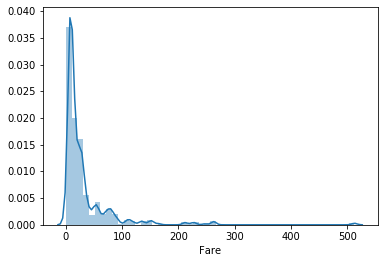

In [448]:
# Analyse the distribution of 'Fare' variable in the data set to find if there is any need for scaling
sns.distplot(train['Fare'])

The Fare amount is normally distributed between 0 to 100.

/Users/anusha/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/anusha/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


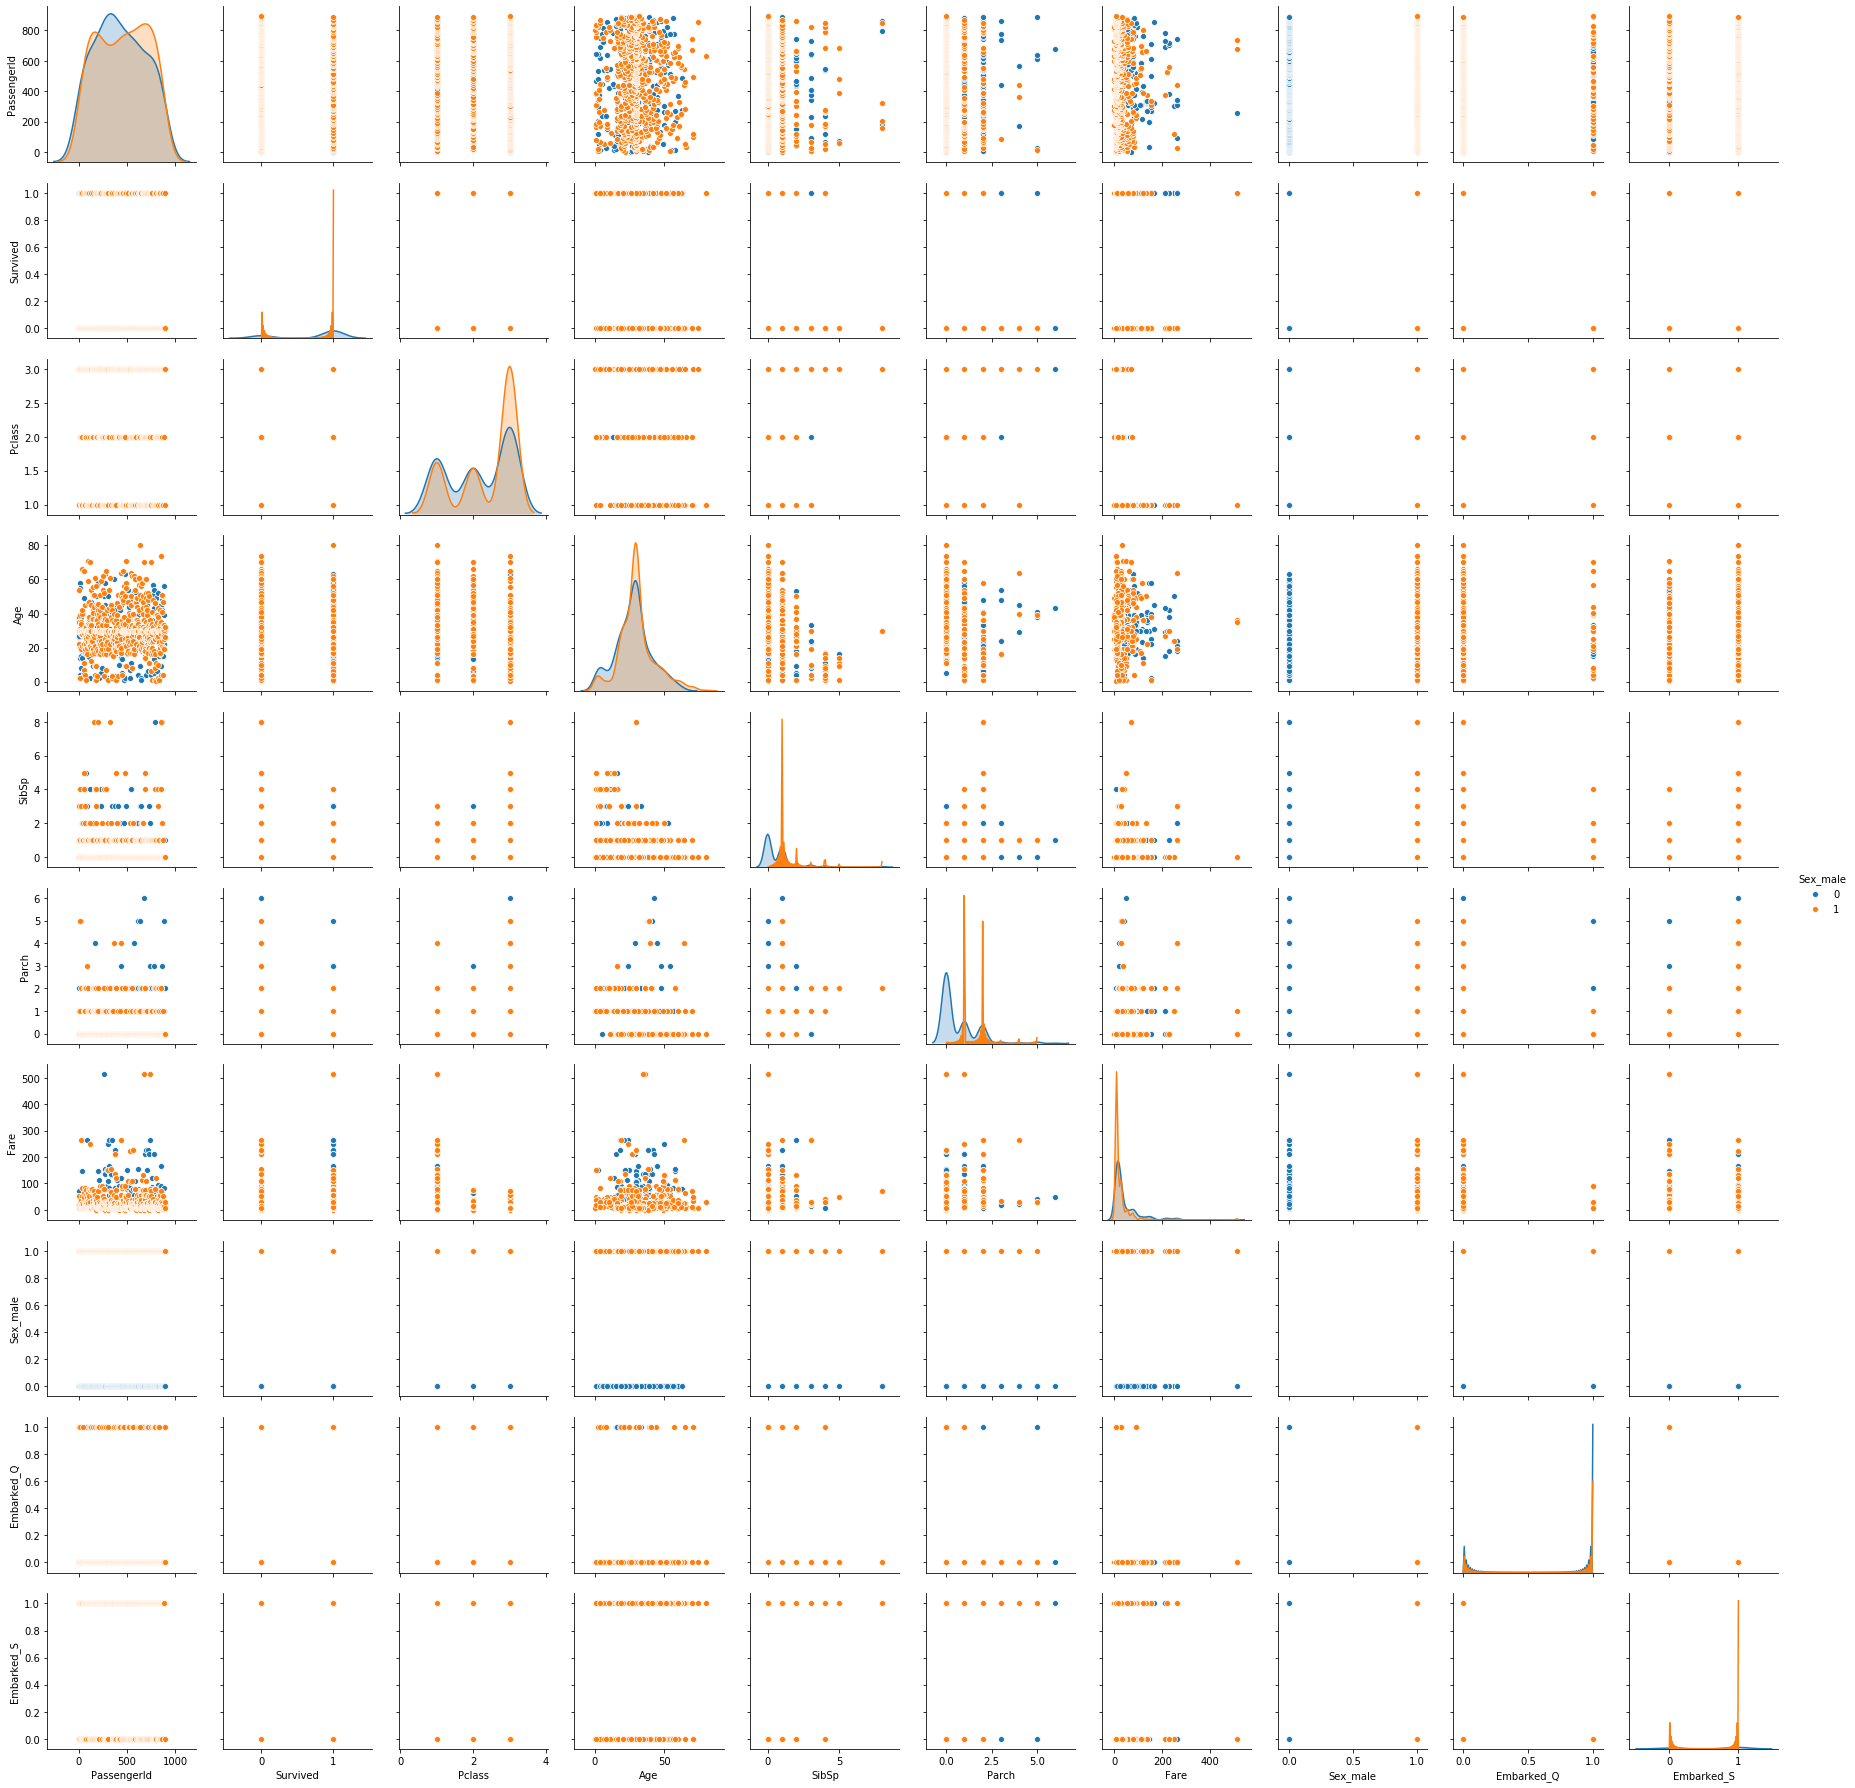

In [449]:
# Analyse pair wise plot of all the variables to interpret the relationship among them
sns.pairplot(train_tidy, hue = 'Sex_male')

The important variables to predict Survived are:
Survived      1.000000
Pclass        0.335549
Age           0.074673
Parch         0.083151
Fare          0.255290
Sex_male      0.541585
Embarked_S    0.151777
Name: Survived, dtype: float64


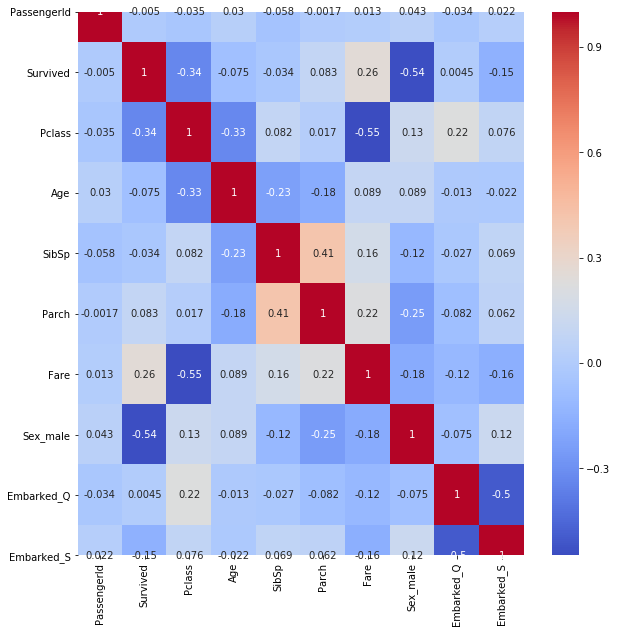

In [450]:
# Get the correlation matrix and plot heatmap to check the correlation of Survived with other variables
correlation_matrix = train_tidy.corr()
correlation_features = correlation_matrix.index
plt.figure(figsize=(10,10))
graph = sns.heatmap(train_tidy[correlation_features].corr(),annot=True,cmap="coolwarm")

# Get the variables with correlation > 0.05 as important variables
correlation_y = abs(correlation_matrix["Survived"])
important_features = correlation_y[correlation_y > 0.05]
print("The important variables to predict Survived are:")
print(important_features)

The important variables that can be picked from this correlation matrix are Pclass, Age, Parch, Fare, Sex_male, Embarked_S.

[ 9.29198010e-06 -1.60363010e-01 -5.60086601e-03 -3.95148120e-02
 -5.39995287e-03  4.29268000e-04 -4.75747775e-01  0.00000000e+00
 -3.80656192e-02]

The coefficient values of the variables using Lasso model:
PassengerId    0.000009
Pclass        -0.160363
Age           -0.005601
SibSp         -0.039515
Parch         -0.005400
Fare           0.000429
Sex_male      -0.475748
Embarked_Q     0.000000
Embarked_S    -0.038066
dtype: float64


Text(0.5, 1.0, 'Feature importance using Lasso Model')

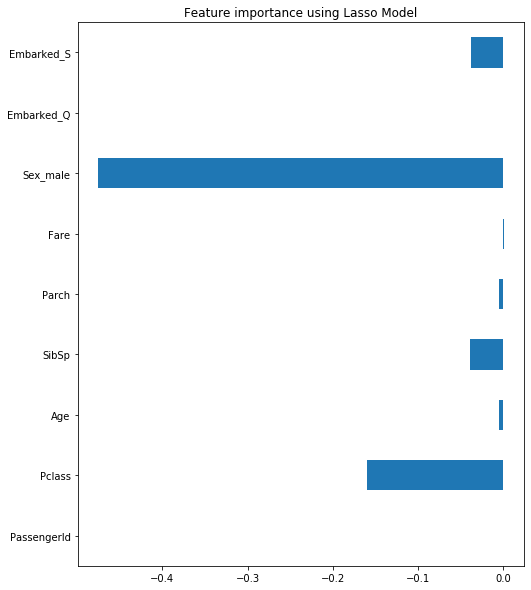

In [451]:
# perform feature selection using LASSO model(LassoCV) to predict 'statistics.average rating'

X = train_tidy[['PassengerId','Pclass', 'Age', 'SibSp','Parch', 'Fare', 'Sex_male', 'Embarked_Q','Embarked_S']]
y = train_tidy['Survived'] 
lasso_model = linear_model.LassoCV(cv=5)
y = y.values.ravel()
lasso_model.fit(X, y)
print(lasso_model.coef_)
coef = pd.Series(lasso_model.coef_, index = X.columns)
print()
print("The coefficient values of the variables using Lasso model:")
print(coef)
important_features = coef
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
important_features.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

The Lasso model also identified almost same variables as important features like Sex_male, Pclass, Embarked_S and others.

### Train Test Split

In [452]:
# Split the dataset into training and test using hold-out method
X = train_tidy[['Pclass', 'Age', 'Parch', 'Fare', 'Sex_male', 'Embarked_S']]
y = train_tidy['Survived']

In [453]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 101)

### Data Modelling - Regression Models

In [454]:
# Linear Regression
LR = LinearRegression()
LR.fit(X_train, y_train)
print("LR intercept: ", LR.intercept_)
coeff_df = pd.DataFrame(LR.coef_, X.columns, columns = ['Coefficient'])
print("Coefficient:")
print(coeff_df)
LR_predicted = LR.predict(X_val)

# Linear Regression metrics
print("Linear Regression")
LR_R_square = LR.score(X = X_val,y = y_val)
print("R_Square: ",LR_R_square)
LR_RMSE = np.sqrt(metrics.mean_squared_error(y_val, LR_predicted))
print("RMSE: ", LR_RMSE)

LR intercept:  1.2931168493964096
Coefficient:
            Coefficient
Pclass        -0.168750
Age           -0.004332
Parch         -0.039727
Fare           0.000023
Sex_male      -0.507788
Embarked_S    -0.076718
Linear Regression
R_Square:  0.42494942058179425
RMSE:  0.3713249092489789


In [455]:
# Logistic Regression
LogR = LogisticRegression()
LogR.fit(X_train, y_train)
LogR_predicted = LogR.predict(X_val)

# Logistic Regression metrics
print("Logistic Regression")
LogR_R_square = LogR.score(X = X_val,y = y_val)
print("R_Square: ",LogR_R_square)
LogR_RMSE = np.sqrt(metrics.mean_squared_error(y_val, LogR_predicted))
print("RMSE: ", LogR_RMSE)

# Logistic Regression classification report
print(classification_report(y_test,LogR_predicted))

Logistic Regression
R_Square:  0.7865168539325843
RMSE:  0.4620423639315076
              precision    recall  f1-score   support

           0       0.79      0.89      0.83       107
           1       0.79      0.63      0.70        71

    accuracy                           0.79       178
   macro avg       0.79      0.76      0.77       178
weighted avg       0.79      0.79      0.78       178



/Users/anusha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [456]:
# ridge regression
Ridge_model = linear_model.Ridge(alpha=.5).fit(X = X_train, y = y_train)
Ridge_predicted = Ridge_model.predict(X_val)

print("Ridge Regression")
Ridge_R_square = Ridge_model.score(X = X_val,y = y_val)
print("R_Square: ",Ridge_R_square)
Ridge_RMSE = np.sqrt(metrics.mean_squared_error(y_val, Ridge_predicted))
print("RMSE: ", Ridge_RMSE)

Ridge Regression
R_Square:  0.42500122884706426
RMSE:  0.37130818190932807


In [457]:
# gradiant boosting
GB_model = GradientBoostingRegressor(n_estimators=10, learning_rate=0.1,
          max_depth=1, random_state=0).fit(X = X_train, y = y_train)

GB_predicted = GB_model.predict(X_val)

print("Ridge Regression")
GB_R_square = GB_model.score(X = X_val,y = y_val)
print("R_Square: ",GB_R_square)
GB_RMSE = np.sqrt(metrics.mean_squared_error(y_val, GB_predicted))
print("RMSE: ", GB_RMSE)

Ridge Regression
R_Square:  0.26361077228593477
RMSE:  0.420198767560128


In [458]:
# random forest
RF_model = RandomForestRegressor(n_estimators=10, random_state=42).fit(X = X_train, y = y_train)

RF_predicted = RF_model.predict(X_val)

print("Ridge Regression")
RF_R_square = RF_model.score(X = X_val,y = y_val)
print("R_Square: ",RF_R_square)
RF_RMSE = np.sqrt(metrics.mean_squared_error(y_val, RF_predicted))
print("RMSE: ", RF_RMSE)

Ridge Regression
R_Square:  0.33489479621521523
RMSE:  0.39934314491615214


### Classification Models

In [459]:
model = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
conf_matrix = metrics.confusion_matrix(y_val, y_pred)
print(conf_matrix)

# Compute evaluation metrics
print("Accuracy: ", metrics.accuracy_score(y_val, y_pred)) # accuracy
print("Error: ", 1 - metrics.accuracy_score(y_val, y_pred)) # error
print("Precision: ", metrics.precision_score(y_val, y_pred, average = None)) # precision
print("Recall: ", metrics.recall_score(y_val, y_pred, average = None)) # recall
print("F1 score: ", metrics.f1_score(y_val, y_pred, average = None)) # F1 score

[[87 20]
 [20 51]]
Accuracy:  0.7752808988764045
Error:  0.2247191011235955
Precision:  [0.81308411 0.71830986]
Recall:  [0.81308411 0.71830986]
F1 score:  [0.81308411 0.71830986]


In [460]:
bag_clf = BaggingClassifier(base_estimator = DecisionTreeClassifier(criterion = "entropy", random_state = 0), n_estimators = 10, random_state = 0)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_val)
conf_matrix = metrics.confusion_matrix(y_val, y_pred)
print(conf_matrix)

# Compute evaluation metrics
print("Accuracy: ", metrics.accuracy_score(y_val, y_pred)) # accuracy
print("Error: ", 1 - metrics.accuracy_score(y_val, y_pred)) # error
print("Precision: ", metrics.precision_score(y_val, y_pred, average = None)) # precision
print("Recall: ", metrics.recall_score(y_val, y_pred, average = None)) # recall
print("F1 score: ", metrics.f1_score(y_val, y_pred, average = None)) # F1 score

[[89 18]
 [21 50]]
Accuracy:  0.7808988764044944
Error:  0.2191011235955056
Precision:  [0.80909091 0.73529412]
Recall:  [0.8317757  0.70422535]
F1 score:  [0.8202765  0.71942446]


In [461]:
ada_clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(criterion = "entropy", random_state = 0), n_estimators = 10, random_state = 0)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_val)
conf_matrix = metrics.confusion_matrix(y_val, y_pred)
print(conf_matrix)

# Compute evaluation metrics
print("Accuracy: ", metrics.accuracy_score(y_val, y_pred)) # accuracy
print("Error: ", 1 - metrics.accuracy_score(y_val, y_pred)) # error
print("Precision: ", metrics.precision_score(y_val, y_pred, average = None)) # precision
print("Recall: ", metrics.recall_score(y_val, y_pred, average = None)) # recall
print("F1 score: ", metrics.f1_score(y_val, y_pred, average = None)) # F1 score

[[87 20]
 [18 53]]
Accuracy:  0.7865168539325843
Error:  0.2134831460674157
Precision:  [0.82857143 0.7260274 ]
Recall:  [0.81308411 0.74647887]
F1 score:  [0.82075472 0.73611111]


In [462]:
RF_clf = RandomForestClassifier(n_estimators = 10, criterion = "entropy", random_state = 0)
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_val)
conf_matrix = metrics.confusion_matrix(y_val, y_pred)
print(conf_matrix)

# Compute evaluation metrics
print("Accuracy: ", metrics.accuracy_score(y_val, y_pred)) # accuracy
print("Error: ", 1 - metrics.accuracy_score(y_val, y_pred)) # error
print("Precision: ", metrics.precision_score(y_val, y_pred, average = None)) # precision
print("Recall: ", metrics.recall_score(y_val, y_pred, average = None)) # recall
print("F1 score: ", metrics.f1_score(y_val, y_pred, average = None)) # F1 score


[[91 16]
 [24 47]]
Accuracy:  0.7752808988764045
Error:  0.2247191011235955
Precision:  [0.79130435 0.74603175]
Recall:  [0.85046729 0.66197183]
F1 score:  [0.81981982 0.70149254]


### Use best model for prediction on test set

In [463]:
# Get test set from the test.csv
test = pd.read_csv("test.csv")

In [464]:
# Explore the fields in test.csv
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [465]:
# Get the information of test set using info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [466]:
# Check for any NAN values in test set
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [467]:
# Replace NAN values with mean for 'Age' variable 
test_mean_age = test['Age'].mean()
print(test_mean_age)
test['Age'].fillna(test_mean_age, inplace = True)

30.272590361445783


In [468]:
# Drop 'Cabin' variable as there are many NAN values and also since we dropped it in training set as well
test.drop(['Cabin'], axis = 1, inplace = True)

In [469]:
# Replace NAN values with mean for 'Fare' variable 
test_mean_fare = test['Fare'].mean()
print(test_mean_fare)
test['Fare'].fillna(test_mean_fare, inplace = True)

35.6271884892086


In [470]:
# Get dummies of categorical attributes like 'Sex' and 'Embarked'
test_tidy = pd.get_dummies(test.iloc[:,[0,1,3,4,5,6,8,9]], drop_first = True)
test_tidy.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [471]:
# Get the important features from test set, the variables which we used for training the models
X_test = test_tidy[['Pclass', 'Age', 'Parch', 'Fare', 'Sex_male', 'Embarked_S']]

In [472]:
# Use best model to predict target variable 'Survived'
y_predicted = ada_clf.predict(X_test)

In [473]:
# Build the output in the required format with passengerid and predicted values for Survived on the test set
output = pd.DataFrame({'PassengerId':test_tidy["PassengerId"], 'Survived': y_predicted})

In [474]:
# copy the output to submission_results.csv
output.to_csv('submission_results.csv', index=False)

In [475]:
# read the generated output csv file
csv_output = pd.read_csv('submission_results.csv')

In [476]:
# verify the format of the file
csv_output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0


In [477]:
csv_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.7 KB
